# Lower Bound - 2

In [1]:
import ema as em
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
#Remove
mdl = em.Model(2,3)
n = mdl.dnodes
e = mdl.delems

mdl.node('1', 0.0, 0.0)
mdl.node('2', 8.0, 0.0)
mdl.node('3', 8.0, 6.0)
mdl.node('4', 16., 6.0)
mdl.node('5', 16., -4.)

# elements
mdl.beam('a', n['1'], n['2'])
mdl.beam('b', n['2'], n['3'])
mdl.beam('c', n['3'], n['4'])
mdl.beam('d', n['4'], n['5'])
mdl.truss('e', n['2'], n['4'])

# redundants
mdl.redundant(e['a'], '2')
mdl.redundant(e['c'], '2')
mdl.redundant(e['d'], '3')
mdl.redundant(e['e'], '1')

# Fixities
mdl.fix(n['1'], ['x', 'y', 'rz'])
mdl.fix(n['5'], ['x', 'y', 'rz'])

# Loading
n['3'].p['y'] = -30
n['3'].p['x'] =  50

# Define plastic capacity
e['a'].Qp['+']['1'] = e['a'].Qp['-']['1'] = 1000
e['a'].Qp['+']['2'] = e['a'].Qp['-']['2'] = 120
e['a'].Qp['+']['3'] = e['a'].Qp['-']['3'] = 120
 
e['c'].Qp['+']['1'] = e['c'].Qp['-']['1'] = 1000
e['c'].Qp['+']['2'] = e['c'].Qp['-']['2'] = 120
e['c'].Qp['+']['3'] = e['c'].Qp['-']['3'] = 120
 
e['b'].Qp['+']['1'] = e['b'].Qp['-']['1'] = 1000
e['b'].Qp['+']['2'] = e['b'].Qp['-']['2'] = 150
e['b'].Qp['+']['3'] = e['b'].Qp['-']['3'] = 150

e['d'].Qp['+']['1'] = e['d'].Qp['-']['1'] = 1000
e['d'].Qp['+']['2'] = e['d'].Qp['-']['2'] = 180
e['d'].Qp['+']['3'] = e['d'].Qp['-']['3'] = 180

e['e'].Qp['+']['1'] = e['e'].Qp['-']['1'] =  30

mdl.numDOF()
em.analysis.characterize(mdl)

(0, 4)

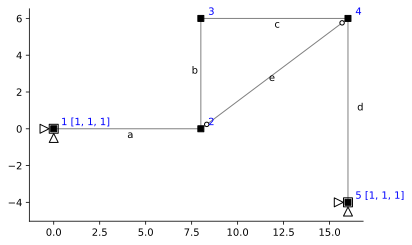

In [3]:
#Remove
fig, ax = plt.subplots(1,1)
em.plot_structure(mdl, ax)

In [4]:
B = em.B_matrix(mdl)
A = em.A_matrix(mdl)
Qpl = em.Qpl_vector(mdl)
P = em.P_vector(B)
B

,$a_1$,$a_2$,$a_3$,$b_1$,$b_2$,$b_3$,$c_1$,$c_2$,$c_3$,$d_1$,$d_2$,$d_3$,$e_1$
$1$,1.0,0.000,0.000,-0.0,-0.166667,-0.166667,0.0,0.000,0.000,0.0,0.0,0.0,-0.8
$2$,0.0,-0.125,-0.125,-1.0,0.000000,0.000000,0.0,0.000,0.000,0.0,0.0,0.0,-0.6
$3$,0.0,0.000,1.000,0.0,1.000000,0.000000,0.0,0.000,0.000,0.0,0.0,0.0,0.0
$4$,0.0,0.000,0.000,0.0,0.166667,0.166667,-1.0,-0.000,-0.000,0.0,0.0,0.0,0.0
$5$,0.0,0.000,0.000,1.0,-0.000000,-0.000000,-0.0,0.125,0.125,0.0,0.0,0.0,0.0
$6$,0.0,0.000,0.000,0.0,0.000000,1.000000,0.0,1.000,0.000,0.0,0.0,0.0,0.0
$7$,0.0,0.000,0.000,0.0,0.000000,0.000000,1.0,0.000,0.000,-0.0,0.1,0.1,0.8
$8$,0.0,0.000,0.000,0.0,0.000000,0.000000,0.0,-0.125,-0.125,1.0,0.0,0.0,0.6
$9$,0.0,0.000,0.000,0.0,0.000000,0.000000,0.0,0.000,1.000,0.0,1.0,0.0,0.0
$10$,-1.0,-0.000,-0.000,0.0,0.000000,0.000000,0.0,0.000,0.000,0.0,0.0,0.0,0.0


In [5]:
A

,$1$,$2$,$3$,$4$,$5$,$6$,$7$,$8$,$9$,$10$,$11$,$12$,$13$,$14$,$15$
$a_1$,1.000000,0.000,0.0,0.000000,0.000,0.0,0.0,0.000,0.0,-1.0,-0.000,0.0,0.0,0.0,0.0
$a_2$,0.000000,-0.125,0.0,0.000000,0.000,0.0,0.0,0.000,0.0,-0.0,0.125,1.0,0.0,0.0,0.0
$a_3$,0.000000,-0.125,1.0,0.000000,0.000,0.0,0.0,0.000,0.0,-0.0,0.125,0.0,0.0,0.0,0.0
$b_1$,-0.000000,-1.000,0.0,0.000000,1.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0
$b_2$,-0.166667,0.000,1.0,0.166667,-0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0
$b_3$,-0.166667,0.000,0.0,0.166667,-0.000,1.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0
$c_1$,0.000000,0.000,0.0,-1.000000,-0.000,0.0,1.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0
$c_2$,0.000000,0.000,0.0,-0.000000,0.125,1.0,0.0,-0.125,0.0,0.0,0.000,0.0,0.0,0.0,0.0
$c_3$,0.000000,0.000,0.0,-0.000000,0.125,0.0,0.0,-0.125,1.0,0.0,0.000,0.0,0.0,0.0,0.0
$d_1$,0.000000,0.000,0.0,0.000000,0.000,0.0,-0.0,1.000,0.0,0.0,0.000,0.0,0.0,-1.0,0.0


In [6]:
Qpr = B.bari@P.f


In [7]:
em.analysis.PlasticAnalysis_wLBT(mdl)

(1.755555555555556,
 array([  57.77777778,  120.        ,  -82.66666667,  -22.66666667,
          82.66666667,  120.        ,  -54.        , -120.        ,
        -120.        ,  -48.        ,  120.        ,  180.        ,
          30.        ]))